In [1]:
import jieba
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("training.csv")
data.head()

,2,合晟资产是一家专注于股票、债券等二级市场投资，为合格投资者提供专业资产管理服务的企业。公司业务范围包括资产管理、投资咨询和投资顾问服务。公司管理的私募基金产品主要包括股票型、债券型资产管理计划或证券投资基金，管理总资产规模80亿元左右。根据中国证券投资基金业协会数据，公司管理的私募证券投资基金（顾问管理）类规模较大，公司管理规模处于50亿元以上的第一梯队。
0,2,公司的主营业务为向中小微企业、个体工商户、农户等客户提供贷款服务，自设立以来主营业务未发生过变化。
1,1,公司立足于商业地产服务，致力于为商业地产开发、销售、运营全产业链提供一整套增值服务，业务覆盖...
2,2,公司经工商管理部门核准的经营范围为“投资咨询、经济信息咨询，企业管理咨询，品牌推广策划，公共...
3,2,该公司的主营业务为在中国境内(港、澳、台除外)开展保险代理销售，依托于自身的产品研究能力和专...
4,1,公司主营业务为地铁商业物业的租赁与运营管理服务。公司以整体租赁的方式取得轨道交通站点附属建筑...


In [3]:
data.columns = ["category", "content"]
data.head()

,category,content
0,2,公司的主营业务为向中小微企业、个体工商户、农户等客户提供贷款服务，自设立以来主营业务未发生过变化。
1,1,公司立足于商业地产服务，致力于为商业地产开发、销售、运营全产业链提供一整套增值服务，业务覆盖...
2,2,公司经工商管理部门核准的经营范围为“投资咨询、经济信息咨询，企业管理咨询，品牌推广策划，公共...
3,2,该公司的主营业务为在中国境内(港、澳、台除外)开展保险代理销售，依托于自身的产品研究能力和专...
4,1,公司主营业务为地铁商业物业的租赁与运营管理服务。公司以整体租赁的方式取得轨道交通站点附属建筑...


# 数据探索

In [4]:
category_list = list(set(data["category"]))
category_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
category_num = []
for i in category_list:
    category_num.append(data[data.category==i]["category"].count())
category_num

[54, 97, 1271, 1268, 227, 810, 303, 206, 163, 278, 96]

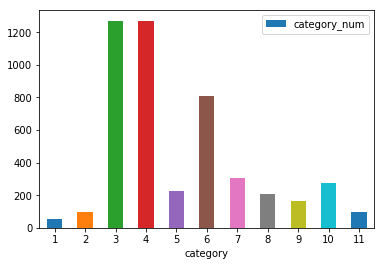

In [6]:
df = pd.DataFrame({"category":category_list, "category_num":category_num})
df.plot.bar(x="category", y="category_num", rot=0)

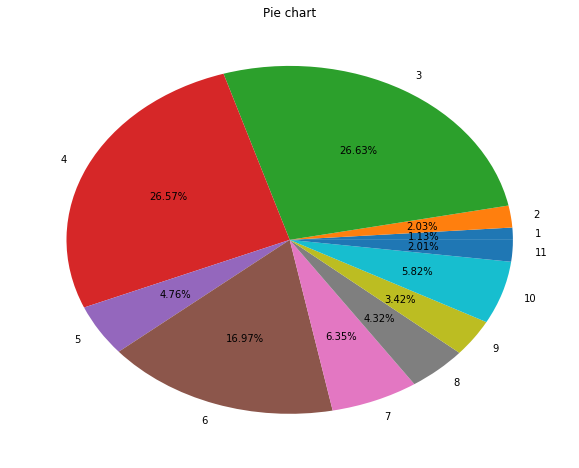

In [7]:
import matplotlib.mlab as mlab
fig = plt.figure(figsize=(10, 8))
plt.pie(category_num, labels=category_list, autopct="%1.2f%%")
plt.title("Pie chart")
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 2 columns):
category    4773 non-null int64
content     4773 non-null object
dtypes: int64(1), object(1)
memory usage: 74.7+ KB


### 无缺值

# 分词

## 调整词频

In [9]:
jieba.load_userdict("现代汉语补充词库1.txt")
fp = open("现代汉语补充词库1.txt", "r", encoding="utf8")
for line in fp:
    line = line.strip()
    jieba.suggest_freq(line, tune=True)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.853 seconds.
Prefix dict has been built succesfully.


## 加停用词

In [10]:
content = data.content.values.tolist()
print(content[1000])

公司是一家集土工类新型高分子合成材料的研发、生产及销售于一体的大型综合企业，产品包括土工织物类、土工膜类、复合材料类、特种土工材料、过滤材料类等12大系列、上百个品种，广泛应用于水利水电（水库防渗、河道生态治理、海堤护坝等）、交通（高铁、地铁、公路、桥梁、机场、港口航道等）、环保（垃圾填埋、污水处理、PM2.5治理、土壤修复、防沙固沙、矿山防渗、矿山掩埋等）、市政工程（海绵城市建设、地下管廊建设、生态水系等）、建筑（房屋防渗、保温节能等）等领域。


In [11]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != "\r\n":
        content_S.append(current_segment)

In [12]:
data_content = pd.DataFrame({"content_S":content_S})
data_content.head()

,content_S
0,"[公司, 的, 主营业务, 为, 向, 中小, 微, 企业, 、, 个体, 工商户, 、, ..."
1,"[公司, 立足于, 商业地产, 服务, ，, 致力于, 为, 商业地产, 开发, 、, 销售..."
2,"[公司, 经, 工商管理, 部门, 核准, 的, 经营范围, 为, “, 投资, 咨询, 、..."
3,"[该, 公司, 的, 主营业务, 为, 在, 中国, 境内, (, 港, 、, 澳, 、, ..."
4,"[公司, 主营业务, 为, 地铁, 商业, 物业, 的, 租赁, 与, 运营, 管理, 服务..."


In [13]:
stopwords = pd.read_csv("./stopwords_1.txt", index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8') 

In [14]:
"""
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != "\r\n":
        content_S.append(current_segment)
"""
# def preprocess_text(content_lines, sentences):
#     for line in content_lines:
#             segs = jieba.lcut(line)
#             segs = filter(lambda x:len(x)>1, segs)
#             segs = filter(lambda x:x not in stopwords, segs)
#             # 构成元组[('个体 工商户 农户 贷款 设立 变化', '1'),[("nong han")]]
#             sentences.append(" ".join(segs))
# # 生成训练数据
# sentences = []
# preprocess_text(data_content, sentences)
# sentences
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean, all_words

contents = data_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean, all_words = drop_stopwords(contents, stopwords)

In [15]:
data_content = pd.DataFrame({"content_S":contents_clean})
sentences = data_content.values.tolist()
data_content = pd.DataFrame({"content_S":contents_clean})
data_content

,content_S
0,"[微, 个体, 工商户, 农户, 贷款, 设立, 变化]"
1,"[立足于, 商业地产, 商业地产, 全, 产业链, 一整套, 增值, 覆盖, 商业, 定位,..."
2,"[工商管理, 部门, 核准, 经营范围, 投资, 咨询, 经济, 信息, 咨询, 咨询, 品..."
3,"[中国, 境内, 港, 澳, 台, 保险代理, 依托, 研究, 能力, 专业化, 能力, 团..."
4,"[地铁, 商业, 物业, 租赁, 整体, 租赁, 方式, 轨道交通, 站点, 附属, 建筑物..."
5,"[位于, 南京市, 江宁区, 小额, 信贷, 融资, 服务供应商, 专注, 微, 个体经营者..."
6,"[商业, 地产商, 内容, 项目前期, 市场调研, 中期, 招商, 营销策划, 营销, 代理..."
7,"[青岛, 拥湾, 资产, 集团股份, 有限公司, 简称, 拥湾, 资产, 股票代码, 834..."
8,"[物业管理, 发生变化, 元, 元及, 元, 占, 营业, 比例, 超过, 传统, 物业管理..."
9,"[物业管理, 家政, 洗染, 建筑, 清洁, 摄影, 扩印, 房地产, 居间, 房地产, 代..."


In [16]:
# 本次项目的词表
data_all_words = pd.DataFrame({"all_words":all_words})
data_all_words.head()

,all_words
0,微
1,个体
2,工商户
3,农户
4,贷款


In [17]:
data_all_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310460 entries, 0 to 310459
Data columns (total 1 columns):
all_words    310460 non-null object
dtypes: object(1)
memory usage: 2.4+ MB


In [18]:
import numpy
#words_count = data_all_words.groupby(by=["all_words"])["all_words"].agg({"count":numpy.size})
#words_count = words_count.reset_index.sort_values(by=["count"], ascending=False)
#words_count.head()

words_count=data_all_words.groupby(by=["all_words"])["all_words"].agg({"count":numpy.size})
words_count=words_count.reset_index().sort_values(by=["count"], ascending=False)
words_count.head()

/home/shnu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,all_words,count
7133,互联网,1380
29784,软件,1145
21091,汽车,1019
17445,报告,996
6326,中国,993


/home/shnu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


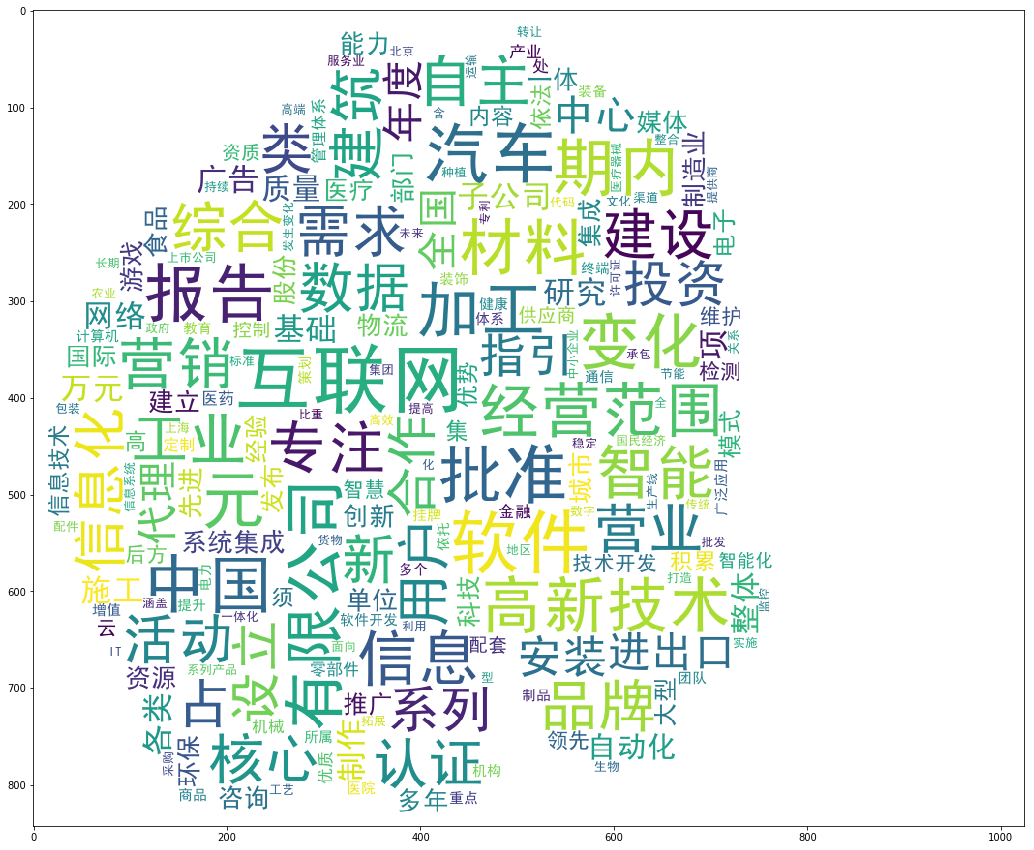

In [19]:
from scipy.misc import imread
from wordcloud import WordCloud, ImageColorGenerator
bimg = imread("./timg.jpeg")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20.0, 15.0)
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white",mask=bimg, max_font_size=80)
# 取前面的100的词，构成字典
word_frequence = {x[0]:x[1] for x in words_count.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

# TF-IDF:提取关键词

In [20]:
import jieba.analyse
index = 2410
print(data["content"][index])
content_S_str = "".join(content_S[index])
print(" ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

公司通过将水渣经过立磨系统加工处理为矿渣粉,做为优质的混凝土掺合料进行销售。公司产品广泛应用于建筑工程、钢铁产业等领域。
掺合料 水渣 立磨 矿渣 钢铁产业


## LDA:主题模型

In [21]:
from gensim import corpora, models, similarities
import gensim
# 做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=11) #类似Kmeans自己指定K

In [22]:
print(lda.print_topic(10, topn=5))

0.016*"互联网" + 0.011*"数据" + 0.010*"用户" + 0.010*"软件" + 0.007*"游戏"


In [23]:
for topic in lda.print_topics(num_topics=11, num_words=5):
    print(topic[1])

0.007*"有限公司" + 0.007*"加工" + 0.006*"制造业" + 0.006*"材料" + 0.006*"进出口"
0.009*"自动化" + 0.007*"工业" + 0.006*"加工" + 0.005*"医药" + 0.004*"药品"
0.009*"材料" + 0.009*"中国" + 0.008*"项" + 0.007*"高新技术" + 0.005*"新"
0.008*"指引" + 0.008*"家装" + 0.007*"批准" + 0.007*"活动" + 0.006*"代码"
0.011*"建筑" + 0.007*"施工" + 0.006*"工业" + 0.006*"资质" + 0.005*"承包"
0.013*"汽车" + 0.011*"批准" + 0.007*"进出口" + 0.007*"经营范围" + 0.007*"物流"
0.007*"医疗" + 0.004*"医疗器械" + 0.004*"加工" + 0.004*"报告" + 0.004*"期内"
0.012*"互联网" + 0.010*"营销" + 0.008*"媒体" + 0.007*"广告" + 0.006*"软件"
0.011*"汽车" + 0.007*"零部件" + 0.006*"安装" + 0.006*"智能" + 0.005*"指引"
0.012*"制作" + 0.009*"发行" + 0.007*"动漫" + 0.006*"建设" + 0.006*"网络"
0.016*"互联网" + 0.011*"数据" + 0.010*"用户" + 0.010*"软件" + 0.007*"游戏"


In [24]:
data_train = pd.DataFrame({"contents_clean":contents_clean, "label":data["category"]})
data_train.head()

,contents_clean,label
0,"[微, 个体, 工商户, 农户, 贷款, 设立, 变化]",2
1,"[立足于, 商业地产, 商业地产, 全, 产业链, 一整套, 增值, 覆盖, 商业, 定位,...",1
2,"[工商管理, 部门, 核准, 经营范围, 投资, 咨询, 经济, 信息, 咨询, 咨询, 品...",2
3,"[中国, 境内, 港, 澳, 台, 保险代理, 依托, 研究, 能力, 专业化, 能力, 团...",2
4,"[地铁, 商业, 物业, 租赁, 整体, 租赁, 方式, 轨道交通, 站点, 附属, 建筑物...",1


In [25]:
x_data_train = data_train["contents_clean"]
y_data_train = data_train["label"]

In [26]:
# list转为string
words = []
for line_index in range(len(x_data_train)):
    try:
        words.append(" ".join(x_data_train[line_index]))
    except:
        print(lie_index, word_index)
words[0]

'微 个体 工商户 农户 贷款 设立 变化'

In [27]:
data_test = pd.read_csv("testing.csv")
data_test.head(20)

,1,经工商登记机关核准，本公司的经营范围包括：许可经营项目：面向“三农”发放贷款、提供融资性担保、开展金融机构业务代理以及其他业务。公司主要业务包括：面向“三农”发放小额贷款业务、应付款保函业务以及提供融资性担保业务。
0,2,公司主营业务是从事保险标的出险后的查勘、检验和估损理算等保险中介服务。公司及子公司中平评估致...
1,3,公司是一家专业的私募股权投资管理机构，主营业务是私募股权投资管理，即通过私募方式向基金出资人...
2,4,公司专注于证券投资咨询服务，主要为客户提供证券投资资讯类产品，通过市场分析、信息整合、投资标...
3,5,公司主要业务为科技园区的建设、管理与运营，主要包括科技物业服务、科技股权投资、科技产业培育及...
4,6,公司成立于2000年4月21日，是海航实业旗下致力于现代物业管理服务的专业物业管理企业。截至...
5,7,"公司主营业务为:发放小额贷款,主营业务区域和目标群体为:安徽省滁州市下辖天长市(县)区域内有..."
6,8,公司主要业务为向涪陵区范围内的中小微企业、个体工商户、农户和个人提供短期贷款服务。根据中国银...
7,9,公司的主营业务是建筑工程安全监控服务，主要通过公司的建筑工程远程监控系统，为建筑工程提供远程...
8,10,公司是一家以房地产中介服务为主，以广告服务为辅的房地产中介服务企业，目前的主要业务有房地产顾...
9,11,山东再担保是中国融资担保行业协会理事单位、山东省担保行业协会和山东省融资担保企业协会会长单位...


In [28]:
data_test = data_test.drop("1", 1)

In [29]:
data_test.head()

,经工商登记机关核准，本公司的经营范围包括：许可经营项目：面向“三农”发放贷款、提供融资性担保、开展金融机构业务代理以及其他业务。公司主要业务包括：面向“三农”发放小额贷款业务、应付款保函业务以及提供融资性担保业务。
0,公司主营业务是从事保险标的出险后的查勘、检验和估损理算等保险中介服务。公司及子公司中平评估致...
1,公司是一家专业的私募股权投资管理机构，主营业务是私募股权投资管理，即通过私募方式向基金出资人...
2,公司专注于证券投资咨询服务，主要为客户提供证券投资资讯类产品，通过市场分析、信息整合、投资标...
3,公司主要业务为科技园区的建设、管理与运营，主要包括科技物业服务、科技股权投资、科技产业培育及...
4,公司成立于2000年4月21日，是海航实业旗下致力于现代物业管理服务的专业物业管理企业。截至...


In [30]:
data_test.columns = ["content"]
data_test.head()

,content
0,公司主营业务是从事保险标的出险后的查勘、检验和估损理算等保险中介服务。公司及子公司中平评估致...
1,公司是一家专业的私募股权投资管理机构，主营业务是私募股权投资管理，即通过私募方式向基金出资人...
2,公司专注于证券投资咨询服务，主要为客户提供证券投资资讯类产品，通过市场分析、信息整合、投资标...
3,公司主要业务为科技园区的建设、管理与运营，主要包括科技物业服务、科技股权投资、科技产业培育及...
4,公司成立于2000年4月21日，是海航实业旗下致力于现代物业管理服务的专业物业管理企业。截至...


In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 1 columns):
content    2380 non-null object
dtypes: object(1)
memory usage: 18.7+ KB


In [32]:
content_test = data_test.content.values.tolist()
print(content_test[1000])

公司主营业务是机械式汽车门锁机构系统、中央控制汽车门锁机构系统的开发、生产与销售；汽车零部件加工、模具制造、机械加工、塑料制品加工业务等。


In [33]:
content_S_test = []
for line in content_test:
    current_segment_test = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != "\r\n":
        content_S_test.append(current_segment_test)

In [34]:
data_content_test = pd.DataFrame({"content_S_test":content_S_test})
data_content_test.head()

,content_S_test
0,"[公司, 主营业务, 是, 从事, 保险, 标的, 出险, 后, 的, 查勘, 、, 检验,..."
1,"[公司, 是, 一家, 专业, 的, 私募, 股权, 投资, 管理机构, ，, 主营业务, ..."
2,"[公司, 专注, 于, 证券, 投资, 咨询服务, ，, 主要, 为, 客户, 提供, 证券..."
3,"[公司, 主要, 业务, 为, 科技园区, 的, 建设, 、, 管理, 与, 运营, ，, ..."
4,"[公司, 成立, 于, 2000, 年, 4, 月, 21, 日, ，, 是, 海航, 实业..."


In [35]:
stopwords_test = pd.read_csv("./stopwords_1.txt", index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')

In [36]:
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean, all_words

contents_test = data_content_test.content_S_test.values.tolist()
stopwords_test = stopwords_test.stopword.values.tolist()
contents_clean_test, all_words_test = drop_stopwords(contents_test, stopwords_test)

In [37]:
data_content_test = pd.DataFrame({"content_S_test":contents_clean_test})
sentences_test = data_content_test.values.tolist()
data_content_test = pd.DataFrame({"content_S_test":contents_clean_test})
data_content_test

,content_S_test
0,"[标的, 出险, 查勘, 检验, 估损, 理算, 中介, 子公司, 中平, 评估, 保险公司..."
1,"[私募, 股权, 投资, 管理机构, 私募, 股权, 投资, 私募, 方式, 基金, 出资人..."
2,"[专注, 证券, 投资, 咨询服务, 证券, 投资, 资讯, 类产品, 分析, 信息, 整合..."
3,"[科技园区, 建设, 科技, 物业, 科技, 股权, 投资, 科技产业, 培育, 科技, 创..."
4,"[海航, 实业, 旗下, 物业管理, 物业管理, 公开, 转让, 说明书, 签署, 注册资金..."
5,"[发放, 小额贷款, 区域, 目标群体, 安徽省, 滁州市, 下辖, 天长市, 县, 区域,..."
6,"[涪陵区, 微, 个体, 工商户, 农户, 短期贷款, 中国, 银监会, 中国人民银行, 小..."
7,"[建筑工程, 安全监控, 建筑工程, 远程, 监控, 建筑工程, 远程, 安全监控, 摒弃,..."
8,"[房地产, 中介, 广告, 为辅, 房地产, 中介, 房地产, 顾问, 策划, 房地产, 代..."
9,"[山东, 担保, 中国, 融资, 担保, 行业协会, 理事单位, 山东省, 担保, 行业协会..."


In [38]:
data_content_test_x = data_content_test["content_S_test"]

In [39]:
# list转为string
# words = []
# for line_index in range(len(data_content_test)):
#     words.append(" ".join(data_content_test[line_index]))
# words[0]
# list转为string
words_test = []
for line_index in range(len(data_content_test_x)):
    try:
        words_test.append(" ".join(data_content_test_x[line_index]))
    except:
        print(line_index, word_index)
words_test[0]

'标的 出险 查勘 检验 估损 理算 中介 子公司 中平 评估 保险公司 被保险人 车辆 财产 货物运输 船舶 损失 评估 保险公司 法院 交警部门 合法 价格 评估 中联 鉴定 法院 交警部门 保险公司 律师 事务所 法医 临床 类 交通事故 类 理赔 类 司法鉴定 理赔 司法 诉讼 过程 专门性 出具 鉴定 意见 东衡 代理 代理 人身保险 财产保险 信用'

## TFidf

# 训练集

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="word", max_features=20000, lowercase = False, ngram_range=(1,2))
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_test = TfidfVectorizer(analyzer="word", max_features=20000, lowercase = False, ngram_range=(1,2))
vectorizer_test.fit(words_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## 神经网络

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import cross_val_score
mlp = MLPClassifier(momentum=0.1)
mlp.fit(vectorizer.transform(words),y_data_train)
scores = cross_val_score(mlp, vectorizer.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

/home/shnu/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.8600296027332976


In [44]:
data_test["test_predict"] = mlp.predict(vectorizer_test.transform(words_test))

In [46]:
data_test.head()

,content,test_predict
0,公司主营业务是从事保险标的出险后的查勘、检验和估损理算等保险中介服务。公司及子公司中平评估致...,3
1,公司是一家专业的私募股权投资管理机构，主营业务是私募股权投资管理，即通过私募方式向基金出资人...,4
2,公司专注于证券投资咨询服务，主要为客户提供证券投资资讯类产品，通过市场分析、信息整合、投资标...,3
3,公司主要业务为科技园区的建设、管理与运营，主要包括科技物业服务、科技股权投资、科技产业培育及...,3
4,公司成立于2000年4月21日，是海航实业旗下致力于现代物业管理服务的专业物业管理企业。截至...,4


In [49]:
category_list_test = list(set(data_test["test_predict"]))
category_list_test

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [50]:
category_num_test = []
for i in category_list_test:
    category_num_test.append(data_test[data_test.test_predict==i]["test_predict"].count())
category_num_test

[2, 692, 958, 11, 579, 71, 24, 9, 32, 2]

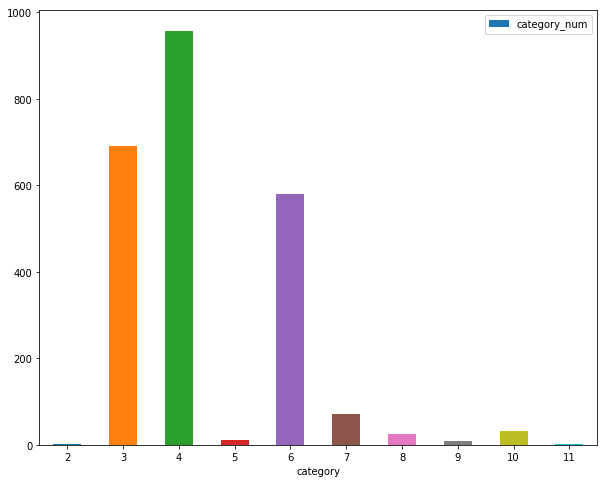

In [53]:
df = pd.DataFrame({"category":category_list_test, "category_num":category_num_test})
df.plot(x="category", y="category_num", kind="bar",figsize=(10,8), rot=0)

In [47]:
data_test.to_csv("result.csv")